# Audio Scatter

## Updatable HTML Audio player

Ipython provides a funcionality to update a display object so one audio player can be used to reproduce multiple files.

First create empty player with an ID

In [1]:
from audio_scatter import create_player, play, audio_scatter

player_id = 1000
create_player(player_id)

Next, assign a wav file to the player and listen to it (autoplay is true by default)

In [2]:
play('sounds/808-Snare01.wav',player_id)

Option for only playing a part of the audio

In [3]:
play('sounds/808-Snare01.wav',player_id, start=0, stop=0.01)

## Drumkit example

Now, lets create an interactive scatter plot with a sound in every dot. 

The scatter plot is made with seaborn, so the coordinates, colors, sizes and file paths are set in a pandas dataframe. The *x*   and   *y* columns determine the coordinates, the *audio_path* column indicates where to read the audio files, and the *index* and *text* column are displayed when clicked.

In [4]:
names = ['808-Kicks01',
 '808-OpenHiHats02',
 '808-Cowbell1',
 '808-HiHats01',
 '808-Clap01',
 '808-Conga1',
 '808-Snare01',
 '808-Clave1',
 '808-Rim1']

path = 'sounds/'
audio_path = [path+name+'.wav' for name in names]

In [5]:
import pandas as pd

coords = [(x,y) for x in range(0,3,1) for y in range(0,3,1)]

x,y = zip(*coords)

data = pd.DataFrame({'x':x, 'y': y, 'color':range(9), 'audio_path':audio_path, 'index': range(9), 'text': names  }).set_index('index',drop=True)
data

,x,y,color,audio_path,text
index,,,,,
0,0,0,0,sounds/808-Kicks01.wav,808-Kicks01
1,0,1,1,sounds/808-OpenHiHats02.wav,808-OpenHiHats02
2,0,2,2,sounds/808-Cowbell1.wav,808-Cowbell1
3,1,0,3,sounds/808-HiHats01.wav,808-HiHats01
4,1,1,4,sounds/808-Clap01.wav,808-Clap01
5,1,2,5,sounds/808-Conga1.wav,808-Conga1
6,2,0,6,sounds/808-Snare01.wav,808-Snare01
7,2,1,7,sounds/808-Clave1.wav,808-Clave1
8,2,2,8,sounds/808-Rim1.wav,808-Rim1


Next, call audio_scatter with the dataframe and the player id. Matplotlib widget is needed to haver interactive plots

<IPython.core.display.Javascript object>


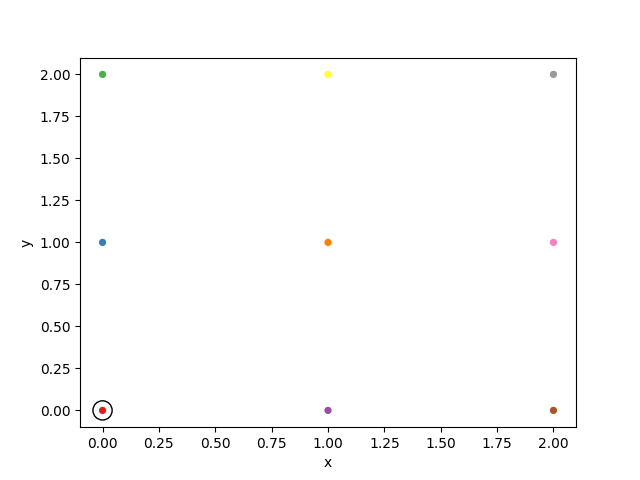

In [6]:
%matplotlib notebook
    
audio_scatter(data, player_id=1000, hue='color', legend=False, palette='Set1')

#### If no sound is produced and no error is seeing, it is probably not finding the audio files, check the audio path

## Play a segment of the audio with start and stop values

<IPython.core.display.Javascript object>


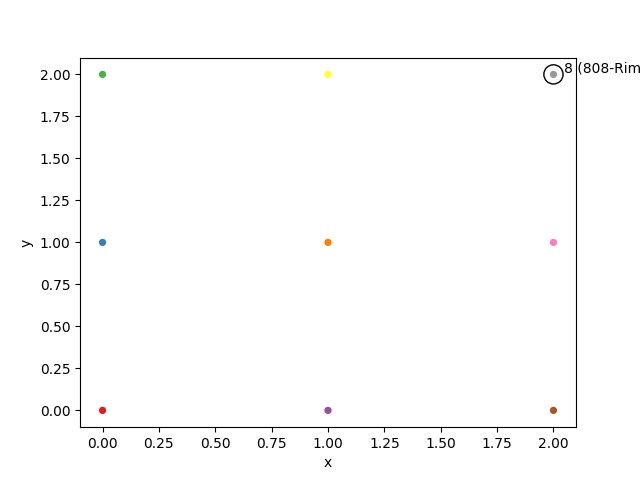

In [9]:
data['start'] = 0
data['stop'] = 0.001
    
audio_scatter(data, player_id=1000, hue='color', legend=False, palette='Set1', start='start', stop='stop')